In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob


In [2]:
file_path = 'twitter_training.csv'  
df = pd.read_csv(file_path)

In [4]:
print(df.columns)
print(df.head())

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [5]:
# Checks for missing values
print(df.isnull().sum())


2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64


In [6]:
# Drops rows with missing values 
df.dropna(subset=['im getting on borderlands and i will murder you all ,'], inplace=True)


In [7]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.replace('\n', ' ')  # Replace newlines with space
    text = text.replace('\r', '')  # Remove carriage returns
    text = text.replace('\t', ' ')  # Replace tabs with space
    text = ''.join([c for c in text if c not in ('!', '.', ':', ',', '?', '-', '_', '(', ')', '[', ']', '{', '}', '"', "'")])  # Remove special characters
    return text

In [8]:
# Replace the column name with the actual column name from your dataset
df['cleaned_text'] = df['im getting on borderlands and i will murder you all ,'].apply(clean_text)


In [9]:
# Sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)


In [10]:
# Classify the sentiment
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_class'] = df['sentiment'].apply(classify_sentiment)


In [11]:
# Display the count of words in each sentiment category
for sentiment_class in df['sentiment_class'].unique():
    text = ' '.join(df[df['sentiment_class'] == sentiment_class]['cleaned_text'])
    word_count = len(text.split())
    print(f"Number of words in {sentiment_class} sentiment: {word_count}")



Number of words in neutral sentiment: 206936
Number of words in positive sentiment: 740613
Number of words in negative sentiment: 451365


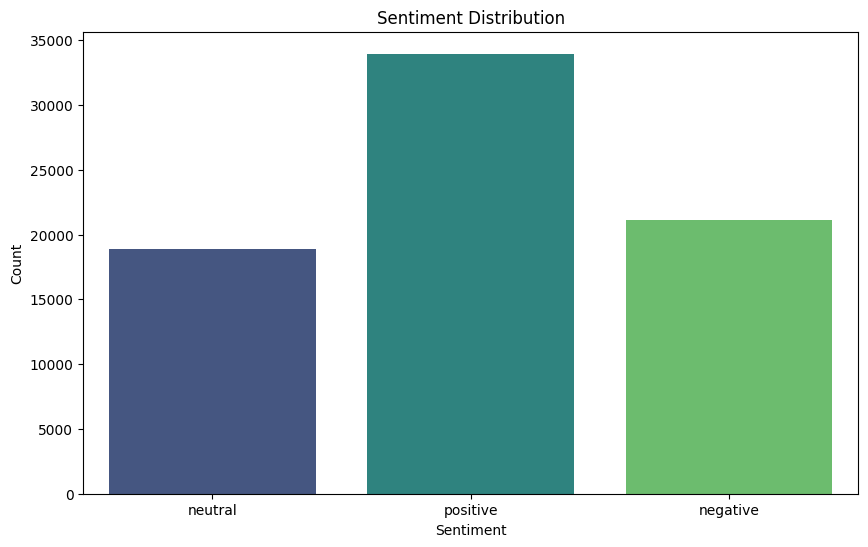

In [15]:
# Sentiment distribution
plt.figure(figsize=(10,6))
sns.countplot(x='sentiment_class', hue='sentiment_class', data=df, palette='viridis', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


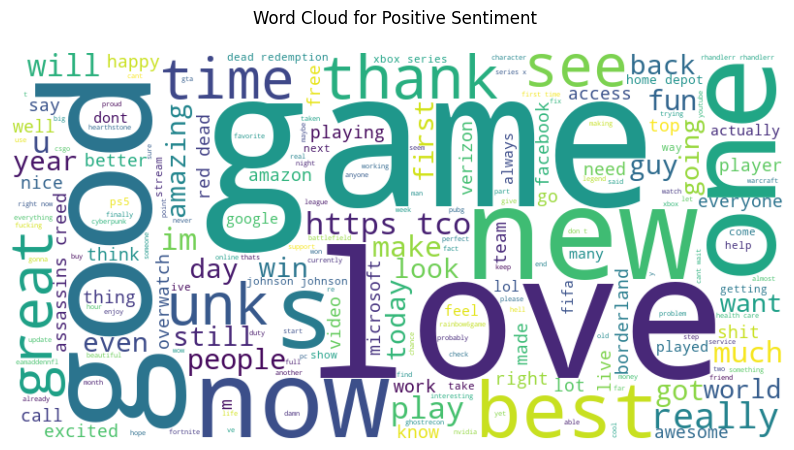

In [37]:
# Word cloud for positive sentiment
positive_text = ' '.join(df[df['sentiment_class'] == 'positive']['cleaned_text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment \n')
plt.axis('off')
plt.show()


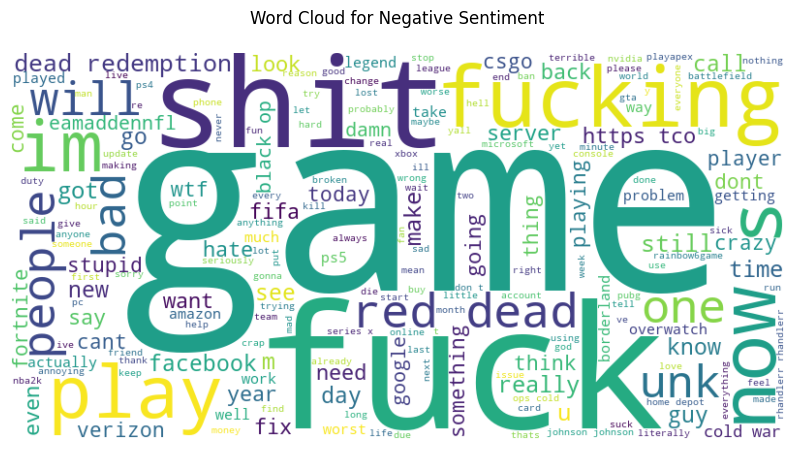

In [33]:
# Word cloud for negative sentiment
negative_text = ' '.join(df[df['sentiment_class'] == 'negative']['cleaned_text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment\n')
plt.axis('off')
plt.show()


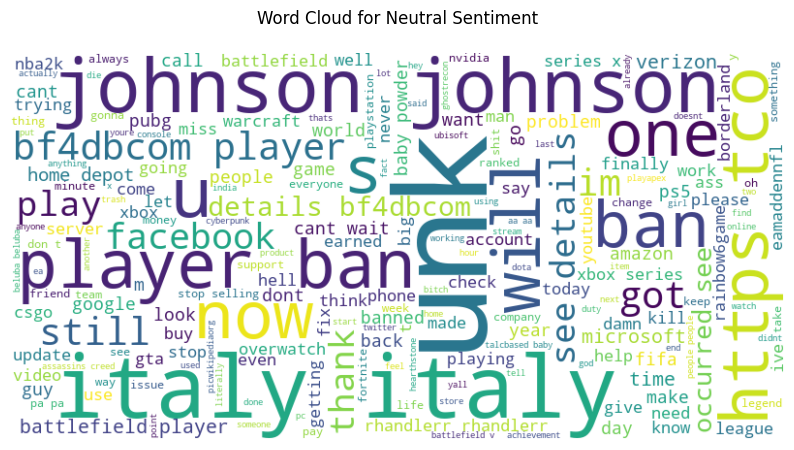

In [25]:
# Word cloud for neutral sentiment
neutral_text = ' '.join(df[df['sentiment_class'] == 'neutral']['cleaned_text'])
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(10, 6))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment\n')
plt.axis('off')
plt.show()